# Sentiment Analysis for Wuthering Waves
## Exploratory Data Analysis, Pre-Modelling, and Modelling
__Harits Mughni Zakinu__

---



# Background

**Wuthering Waves** is an action RPG released by **Kuro Games in May 2024**, featuring a theme of action and adventure. The game has garnered significant attention due to its unique blend of character-driven narratives and stunning visual storytelling. With a growing fan base and increasing engagement on its official YouTube channel, understanding player sentiment has become crucial for the developers to tailor future updates and content.

# Objective

Performing sentiment analysis on comments from the official Wuthering Waves YouTube channel, focusing on two main aspects: characters and story to understand player reactions using Random Forest Classifier and Support Vector Machine.

# Import Libraries

In [ ]:
!pip install wordcloud
!pip install vaderSentiment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

# Libraries for classical machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the Clean Dataset

## Character Dataset

The scraped dataset initially included 14036 rows. After data cleansing and preprocessing, which involved removing duplicate user comments, stripping HTML tags, using regular expressions to remove special characters and numbers, converting words to lowercase, using NLTK to remove stopwords, remove repetitive characters and performing lemmatization on the comments, the dataset now has only 9739 rows.

In [ ]:
df_char_clean = pd.read_csv('yt_comments_char_clean.csv', parse_dates = ['publishedAt'])

In [ ]:
df_char_clean.shape

(9739, 10)

In [ ]:
df_char_clean.sample(10)

,authorDisplayName,textDisplay,textDisplayAdj,scores,neg_score,pos_score,neu_score,compound_score,sentiment,publishedAt
4423,@pauljoseph3081,"Kuro, please drop some skins and fragments to ...",kuro please drop skin fragment collect f p buy...,"{'neg': 0.061, 'neu': 0.696, 'pos': 0.243, 'co...",0.061,0.243,0.696,0.7424,positive,2024-06-07 05:19:16+00:00
2757,@Jacob-zi2su,"<a href=""https://www.youtube.com/watch?v=0caRW...",lot faith winning,"{'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'comp...",0.000,0.408,0.592,0.7351,positive,2024-06-26 07:47:51+00:00
8791,@Schuzzo,No that TD in the village isn&#39;t the girl/e...,td village girl encore likely td girl friend g...,"{'neg': 0.068, 'neu': 0.87, 'pos': 0.061, 'com...",0.068,0.061,0.870,0.0772,positive,2024-06-19 13:35:07+00:00
9541,@S.W-PILGRIM,"So Cutteeeee!!!<br>The voiceovers, jiggles <br...",cutte voiceovers jiggle ost absolute banger,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2024-04-22 10:23:51+00:00
4989,@hrishavdas6999,yinlin covertly pointing at the comment sectio...,yinlin covertly pointing comment section look ...,"{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...",0.068,0.000,0.932,-0.1531,negative,2024-06-06 07:10:04+00:00
4550,@sooleb,Saw someone fall to his knees at walmart,saw someone fall knee walmart,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2024-06-06 16:24:23+00:00
7119,@Hasieur,no need to bet<br>even in the chillest game su...,need beteven chillest game limbus company stil...,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",0.136,0.000,0.864,-0.2960,negative,2024-05-22 10:01:24+00:00
9668,@rosaliestarport1267,"She&#39;s so cute, i can&#39;t wait to get her...",cute wait get game,"{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...",0.000,0.370,0.630,0.7082,positive,2024-04-22 10:06:38+00:00
3048,@SenzaKoi,Is changli’s banner will be the same time as j...,changli banner time jinhsi,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2024-06-26 05:55:32+00:00
335,@Rubbermanlol4578,"Fun game, but too bad it forces 20-30 minute r...",fun game bad force minute repetitive daily lon...,"{'neg': 0.247, 'neu': 0.68, 'pos': 0.073, 'com...",0.247,0.073,0.680,-0.7269,negative,2024-07-19 20:32:10+00:00


In [ ]:
df_char_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   authorDisplayName  9737 non-null   object             
 1   textDisplay        9739 non-null   object             
 2   textDisplayAdj     9739 non-null   object             
 3   scores             9739 non-null   object             
 4   neg_score          9739 non-null   float64            
 5   pos_score          9739 non-null   float64            
 6   neu_score          9739 non-null   float64            
 7   compound_score     9739 non-null   float64            
 8   sentiment          9739 non-null   object             
 9   publishedAt        9739 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 761.0+ KB


In [ ]:
# Establish our baseline score
sentiment_proportion = df_char_clean['sentiment'].value_counts(normalize=True)

# Tentukan sentimen yang paling sering muncul (baseline)
baseline_sentiment = sentiment_proportion.idxmax()
print(f'Baseline sentiment: {baseline_sentiment}')

# Hitung akurasi baseline
baseline_accuracy = sentiment_proportion.max()
print(f'Baseline Accuracy: {baseline_accuracy}')

Baseline sentiment: positive
Baseline Accuracy: 0.5204846493479823


## Story Dataset

The scraped dataset initially included 10737 rows. After data cleansing and preprocessing, which involved removing duplicate user comments, stripping HTML tags, using regular expressions to remove special characters and numbers, converting words to lowercase, using NLTK to remove stopwords, remove repetitive characters, and performing lemmatization on the comments, the dataset now has only 7776 rows.

In [ ]:
df_story_clean = pd.read_csv('yt_comments_story_clean.csv', parse_dates = ['publishedAt'])

In [ ]:
df_story_clean.shape

(7776, 10)

In [ ]:
df_story_clean.sample(10)

,authorDisplayName,textDisplay,textDisplayAdj,scores,neg_score,pos_score,neu_score,compound_score,sentiment,publishedAt
4444,@superpichu9115,The narrating voice sucks.,narrating voice suck,"{'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'comp...",0.455,0.000,0.545,-0.3612,negative,2024-05-21 04:29:21+00:00
6860,@OBAY_YASSIN,"Dear Kuro Game Company, am writing to express ...",dear kuro game company writing express gratitu...,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",0.000,0.282,0.718,0.9934,positive,2024-02-18 08:57:31+00:00
7700,@yuu23163,"holy smokes, this is fire!",holy smoke fire,"{'neg': 0.402, 'neu': 0.598, 'pos': 0.0, 'comp...",0.402,0.000,0.598,-0.4003,negative,2024-02-18 03:04:49+00:00
2478,@saturninocarino199,I feel so bad on genshin 😂,feel bad genshin,"{'neg': 0.351, 'neu': 0.44, 'pos': 0.209, 'com...",0.351,0.209,0.440,-0.3800,negative,2024-06-20 09:28:45+00:00
5851,@midnight-hq4zg,"@@user-mo6jt3kl3nno it doesn&#39;t, it&#39;s j...",user mo jt kl nno competition childish,"{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...",0.216,0.000,0.784,-0.2960,negative,2024-04-02 00:41:35+00:00
692,@lemoniscate,This OST is Wuwa’s equivalent of HIKARI,ost wuwa equivalent hikari,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2024-07-02 22:52:16+00:00
1072,@keizuna1097,Ngl this scene soo peak with that ost n cinema...,ngl scene soo peak ost n cinematic presentation,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2024-07-02 03:10:42+00:00
709,@yuna1598,"Let me tell u , owh my god when this started t...",let tell u owh god started play love beautiful...,"{'neg': 0.035, 'neu': 0.682, 'pos': 0.283, 'co...",0.035,0.283,0.682,0.9524,positive,2024-07-02 18:51:06+00:00
7440,@leav4360,Now what if WW and PGR is at the same universe...,ww pgr universe imagine possibility,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2024-02-18 03:26:57+00:00
2264,@swarajpaul4081,Genshin could never,genshin could never,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2024-06-20 12:10:49+00:00


In [ ]:
df_story_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   authorDisplayName  7776 non-null   object             
 1   textDisplay        7776 non-null   object             
 2   textDisplayAdj     7776 non-null   object             
 3   scores             7776 non-null   object             
 4   neg_score          7776 non-null   float64            
 5   pos_score          7776 non-null   float64            
 6   neu_score          7776 non-null   float64            
 7   compound_score     7776 non-null   float64            
 8   sentiment          7776 non-null   object             
 9   publishedAt        7776 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 607.6+ KB


In [ ]:
# Establish our baseline score
sentiment_proportion = df_story_clean['sentiment'].value_counts(normalize=True)

# Determine the most frequently occurring sentiments (baseline)
baseline_sentiment = sentiment_proportion.idxmax()
print(f'Baseline sentiment: {baseline_sentiment}')

# Calculate baseline accuracy
baseline_accuracy = sentiment_proportion.max()
print(f'Baseline Accuracy: {baseline_accuracy}')

Baseline sentiment: positive
Baseline Accuracy: 0.5073302469135802


# Exploratory Data Analysis

### Character Aspect

Text(0.5, 1.0, 'Sentiment Analysis of Character Aspect')

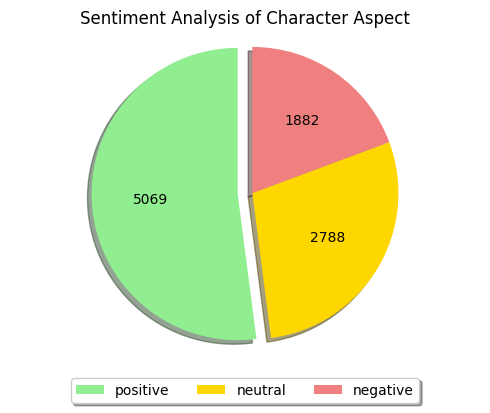

In [ ]:
# Create a pie chart for the character aspect
char_sentiment_counts = df_char_clean['sentiment'].value_counts()
char_labels = char_sentiment_counts.index
char_sizes = char_sentiment_counts.values
char_colors = ['lightgreen', 'gold', 'lightcoral']
char_explode = (0.1, 0, 0)
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100))
        return '{v:d}'.format(v=val)
    return my_autopct

plt.figure(figsize=(5, 4))

plt.pie(char_sizes, explode=char_explode, colors=char_colors,
        autopct=autopct_format(char_sizes), shadow=True, startangle=90)
plt.legend(char_labels, loc="upper center", bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=3, fontsize='medium')
plt.axis('equal')
plt.tight_layout()
plt.title('Sentiment Analysis of Character Aspect')

The character aspect received 5069 positive sentiments, 2788 neutral sentiments, and 1882 negative sentiments out of a total of 9739 responses. This suggests that players are generally satisfied with character in this game.

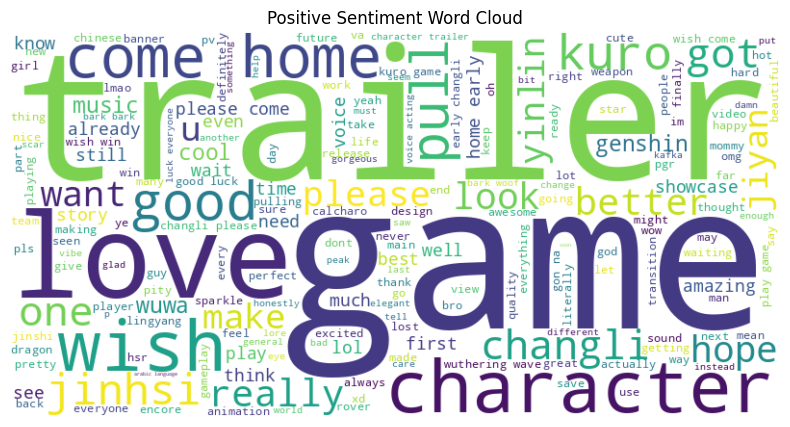

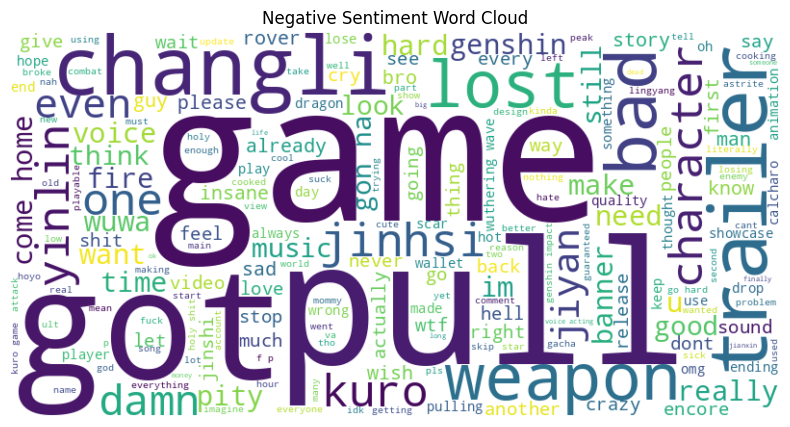

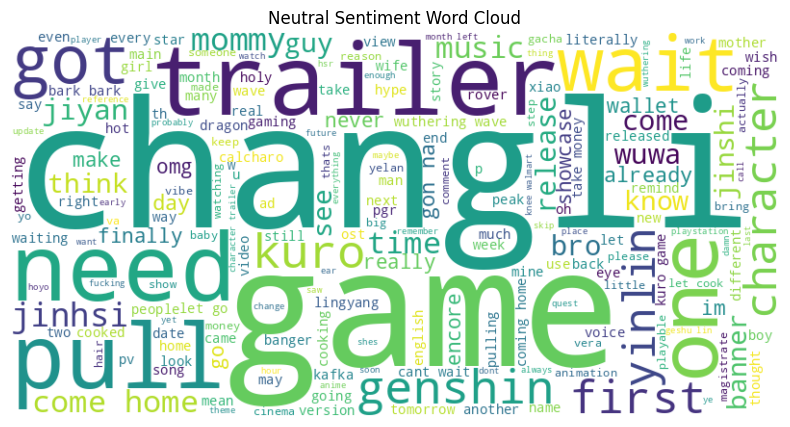

In [ ]:
# Separate data based on sentiment
positive_text = ' '.join(df_char_clean[df_char_clean['sentiment'] == 'positive']['textDisplayAdj'])
negative_text = ' '.join(df_char_clean[df_char_clean['sentiment'] == 'negative']['textDisplayAdj'])
neutral_text = ' '.join(df_char_clean[df_char_clean['sentiment'] == 'neutral']['textDisplayAdj'])

# Create a Word Cloud for positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

# Create a Word Cloud for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

# Create a Word Cloud for neutral sentiment
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Word Cloud')
plt.show()

- In the positive sentiment class for the character aspect, characters like Jinshi, Changli, Yinlin, and Jiyan are mentioned the most, indicating that these characters are the most popular.
- In the negative sentiment class, the character Changli has the largest font size, indicating that there are quite a few players who are not very happy with this character.

## Story Aspect

Text(0.5, 1.0, 'Sentiment Analysis of Story Aspect')

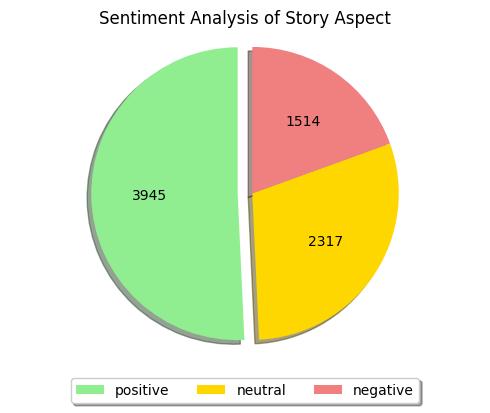

In [ ]:
# Create a pie chart for the story aspect
story_sentiment_counts = df_story_clean['sentiment'].value_counts()
story_labels = story_sentiment_counts.index
story_sizes = story_sentiment_counts.values
story_colors = ['lightgreen', 'gold', 'lightcoral']
story_explode = (0.1, 0, 0)
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100))
        return '{v:d}'.format(v=val)
    return my_autopct

plt.figure(figsize=(5, 4))

plt.pie(story_sizes, explode=story_explode, colors=story_colors,
        autopct=autopct_format(story_sizes), shadow=True, startangle=90)
plt.legend(char_labels, loc="upper center", bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=3, fontsize='medium')
plt.axis('equal')
plt.tight_layout()
plt.title('Sentiment Analysis of Story Aspect')

The story aspect received 3945 positive sentiments, 2317 neutral sentiments, and 1514 negative sentiments out of a total of 7776 responses. This suggests that players are generally satisfied with the story in this game.

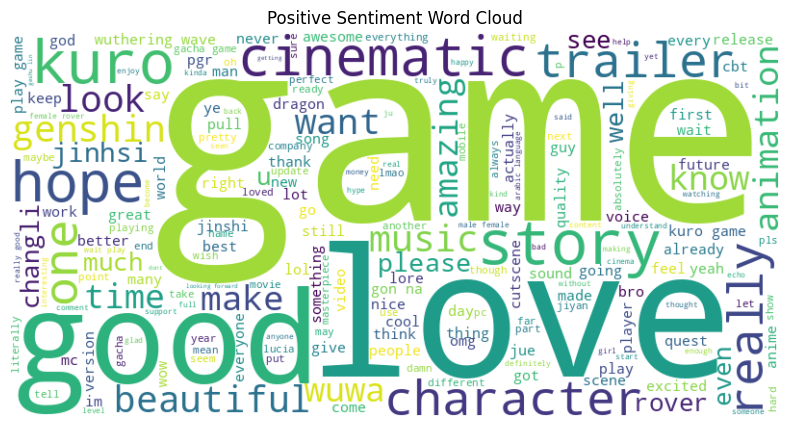

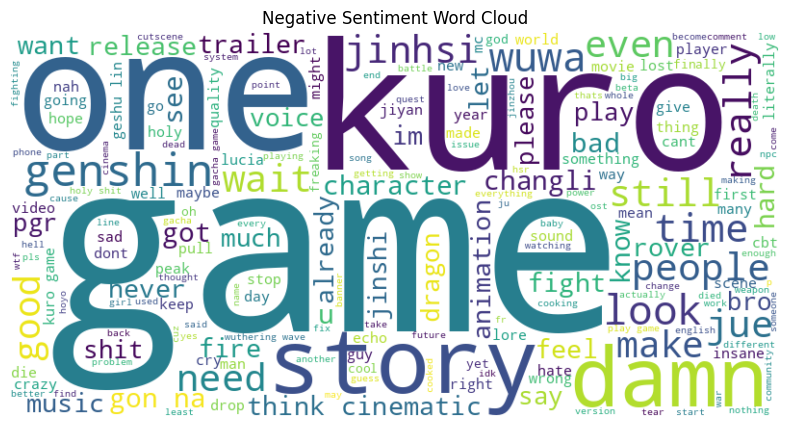

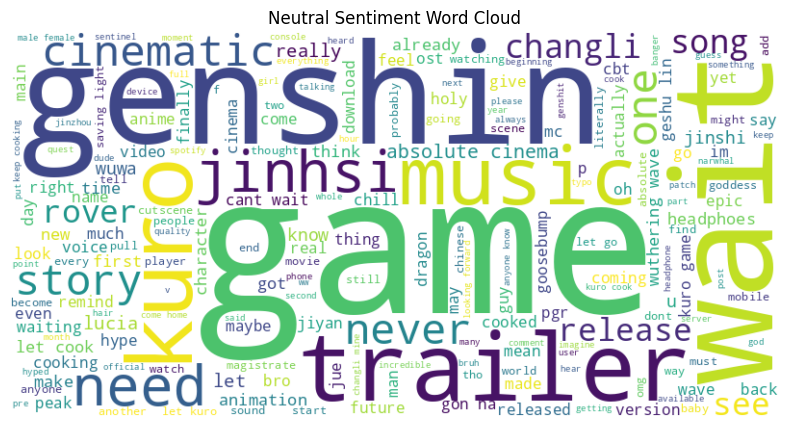

In [ ]:
# Separate data based on sentiment
positive_text = ' '.join(df_story_clean[df_story_clean['sentiment'] == 'positive']['textDisplayAdj'])
negative_text = ' '.join(df_story_clean[df_story_clean['sentiment'] == 'negative']['textDisplayAdj'])
neutral_text = ' '.join(df_story_clean[df_story_clean['sentiment'] == 'neutral']['textDisplayAdj'])

# Create a Word Cloud for positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

# Create a Word Cloud for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

# Create a Word Cloud for neutral sentiment
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Word Cloud')
plt.show()

- In the positive sentiment class for the story aspect, words like “good”, “love”, and “cinematic” are mentioned the most, indicating that many users have a high appreciation for the quality of the game's story.
- In the negative sentiment class, the frequent mention of words like "damn", "really", and "good" suggests that despite some positive elements, users are largely dissatisfied or frustrated with the story. They believe the story could be improved with certain changes or enhancements.

In [ ]:
analyzer = SentimentIntensityAnalyzer()
comments = []
for comment in df_story_clean['textDisplayAdj']:
    comments.append(comment)

# Function to classify sentiment
def classify_sentiment(comment):
    score = analyzer.polarity_scores(comment)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
# Function to check complaints
def contains_complaint(comment, keywords):
    return any(keyword in comment.lower() for keyword in keywords)

complaint_keywords = ['story', 'game', 'wuwa', 'kuro', 'look', 'one', 'sad',
                      'lost', 'damn', 'realy', 'gonna', 'bad', 'boring', 'drop', 'slow',
                      'poor','lack', 'even', 'skip', 'never']

# Classify each comment
comments_df = pd.DataFrame(comments, columns=['Comment'])
comments_df['Sentiment'] = comments_df['Comment'].apply(classify_sentiment)

# Find comments with complaints
comments_df['Complaint'] = comments_df['Comment'].apply(lambda x: contains_complaint(x, complaint_keywords))
complaint_comments = comments_df[comments_df['Complaint']]

complaints = complaint_comments[complaint_comments['Sentiment'] == 'Negative']
pd.set_option('display.max_colwidth', None)

In [ ]:
print("Complaints:")
complaints.sample(10)

Complaints:


,Comment,Sentiment,Complaint
2985,snow glow white mountain tonight footprint seen kingdom isolation look like queen,Negative,True
4793,sick damn sold,Negative,True
4438,game dead release natlan,Negative,True
112,easy simp changli poor rover turned simp level,Negative,True
1974,prefer look cape man bad wearing option cause make look regal badass,Negative,True
745,buff tacet field drop,Negative,True
5111,hope game good becomes wake call hoyo stop extremely stingy game fuck company literally competition,Negative,True
6882,even though hate repetitive isekai shit look somewhat breathtaking interesting,Negative,True
7519,want play freaking bad let play,Negative,True
3898,none jp va edit watching crazy kuro cook much wtf even got goosebump part jinshi ascension magistrate transition smooth cinematic wtf complaining crazy good love work pls keep give thrill,Negative,True


In [ ]:
# Function to check wish/hope
def contains_wish(comment, keywords):
    return any(keyword in comment.lower() for keyword in keywords)

wish_keywords = ['better', 'amazing', 'great', 'best', 'good',  'improved',
                 'fantastic', 'cool', 'complex', 'original', 'creative',
                 'satisfying', 'realistic', 'cinematic', 'beautiful']

# Classify each comment
comments_df = pd.DataFrame(comments, columns=['Comment'])
comments_df['Sentiment'] = comments_df['Comment'].apply(classify_sentiment)

# Find comments with wish/hope
comments_df['Wish'] = comments_df['Comment'].apply(lambda x: contains_wish(x, wish_keywords))
wish_comments = comments_df[comments_df['Wish']]

wishes = wish_comments[wish_comments['Sentiment'] == 'Positive']
pd.set_option('display.max_colwidth', None)

In [ ]:
print("wishes:")
wishes.sample(10)

wishes:


,Comment,Sentiment,Wish
3325,white eyelash gorgeous bet good kisser,Positive,True
1141,music moment definitely amazing,Positive,True
2014,brought tear eye good job kuro masterful,Positive,True
1690,cool fix translation issue able scroll text love everything good add map button controller thx kuro,Positive,True
2474,beautiful animation great work everyone involved,Positive,True
3309,truly peak cinematic awesome,Positive,True
6068,npc look really cool lol,Positive,True
2245,fantastic animation like chinese animation game scenery amazingi want play wuthering wave storage full large gb file game,Positive,True
1962,suprised people say game fallen still video trending hr people clearly still interested built hype hope story go well voice acting direction closer good part game e combat,Positive,True
1322,bro please add beautiful music think game perfect one flaw even though like gameplay really enjoy music please add sleep peacfully especially exploring beautiful place,Positive,True


# Character Aspect

## Pre-Modelling

### Separate feature & target

In [ ]:
# Change the column data type
df_char_clean = df_char_clean.astype({'sentiment' : 'category'})
df_char_clean = df_char_clean.astype({'textDisplayAdj' : 'string'})

# Separate features and targets
X_char = df_char_clean['textDisplayAdj']
y_char = df_char_clean['sentiment']

print(y_char.value_counts())

sentiment
positive    5069
neutral     2788
negative    1882
Name: count, dtype: int64


### Splitting dataset

In [ ]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_char, y_char, test_size=0.2, random_state=42)

### Feature extraction

In [ ]:
# Apply TF-IDF to the text for the training set and test set separately
tfidf = TfidfVectorizer()

# Fit and transform on training data and test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Balancing Data with SMOTE

In [ ]:
# Use SMOTE to balance training data
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Convert SMOTE results back to DataFrame
df_resampled = pd.DataFrame(X_train_resampled.toarray(), columns=tfidf.get_feature_names_out())
df_resampled['sentiment'] = y_train_resampled

# Show information about balanced data
print(df_resampled['sentiment'].value_counts())

sentiment
negative    4088
neutral     4088
positive    4088
Name: count, dtype: int64


## Modelling

### Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)
y_train_pred = rf_model.predict(X_train_tfidf)

print("Classification Report Random Forest -- Training:\n", classification_report(y_train, y_train_pred))

Classification Report Random Forest -- Training:
               precision    recall  f1-score   support

    negative       0.99      0.99      0.99      1506
     neutral       0.98      0.99      0.99      2197
    positive       0.99      0.99      0.99      4088

    accuracy                           0.99      7791
   macro avg       0.99      0.99      0.99      7791
weighted avg       0.99      0.99      0.99      7791



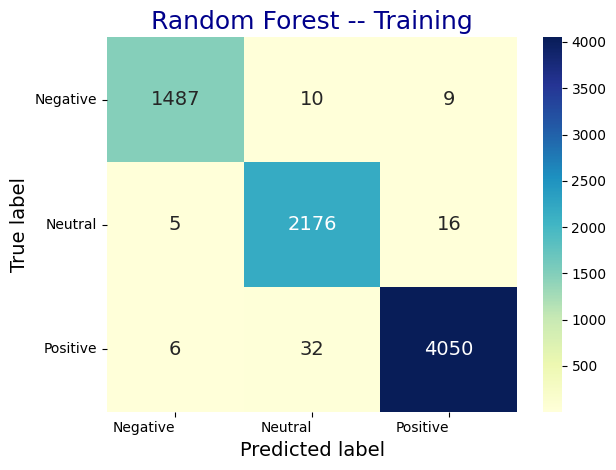

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Negative', 'Neutral', 'Positive'), ('Negative', 'Neutral', 'Positive'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Random Forest -- Training', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
rf_model = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)
y_test_pred = rf_model.predict(X_test_tfidf)

print("Classification Report Random Forest -- Test:\n", classification_report(y_test, y_test_pred))

Classification Report Random Forest -- Test:
               precision    recall  f1-score   support

    negative       0.67      0.49      0.57       376
     neutral       0.69      0.89      0.78       591
    positive       0.85      0.79      0.82       981

    accuracy                           0.76      1948
   macro avg       0.74      0.72      0.72      1948
weighted avg       0.77      0.76      0.76      1948



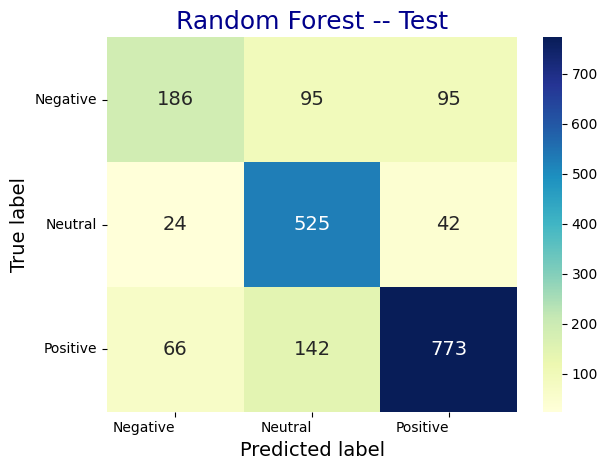

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Negative', 'Neutral', 'Positive'), ('Negative', 'Neutral', 'Positive'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Random Forest -- Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### Support Vector Machine

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
y_train_pred = svm_model.predict(X_train_tfidf)

print("Classification Report Support Vector Machine -- Training:\n",
      classification_report(y_train, y_train_pred))

Classification Report Support Vector Machine -- Training:
               precision    recall  f1-score   support

    negative       0.83      0.87      0.85      1506
     neutral       0.83      0.94      0.88      2197
    positive       0.96      0.87      0.91      4088

    accuracy                           0.89      7791
   macro avg       0.87      0.89      0.88      7791
weighted avg       0.90      0.89      0.89      7791



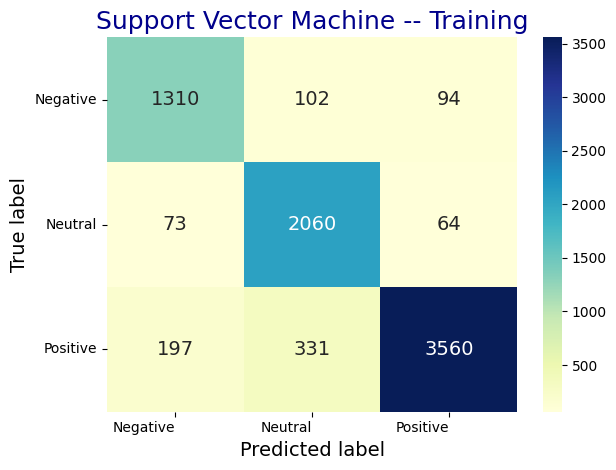

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Negative', 'Neutral', 'Positive'), ('Negative', 'Neutral', 'Positive'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Support Vector Machine -- Training', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
y_test_pred = svm_model.predict(X_test_tfidf)

print("Classification Report Support Vector Machine -- Test:\n",
      classification_report(y_test, y_test_pred))

Classification Report Support Vector Machine -- Test:
               precision    recall  f1-score   support

    negative       0.57      0.59      0.58       376
     neutral       0.69      0.83      0.76       591
    positive       0.88      0.75      0.81       981

    accuracy                           0.75      1948
   macro avg       0.71      0.73      0.72      1948
weighted avg       0.76      0.75      0.75      1948



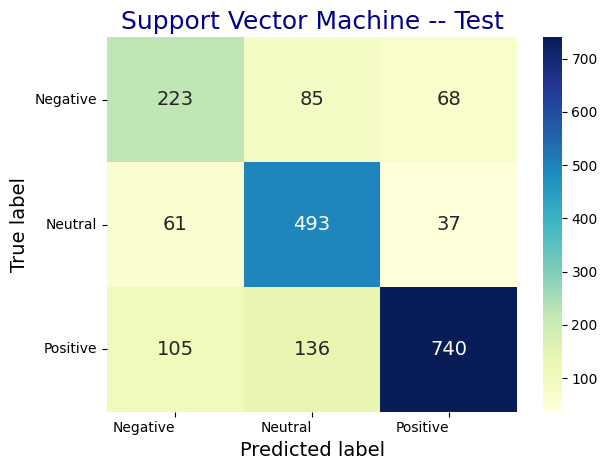

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Negative', 'Neutral', 'Positive'), ('Negative', 'Neutral', 'Positive'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Support Vector Machine -- Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# Story Aspect

## Pre-Modelling

### Separate feature & target

In [ ]:
# Change the column data type
df_story_clean = df_story_clean.astype({'sentiment' : 'category'})
df_story_clean = df_story_clean.astype({'textDisplayAdj' : 'string'})

# Separate features and targets
X_story = df_story_clean['textDisplayAdj']
y_story = df_story_clean['sentiment']

print(y_story.value_counts())

sentiment
positive    3945
neutral     2317
negative    1514
Name: count, dtype: int64


### Splitting dataset

In [ ]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_story, y_story, test_size=0.2, random_state=42)

### Fature extraction

In [ ]:
# Apply TF-IDF to the text for the training set and test set separately
tfidf2 = TfidfVectorizer()

# Fit and transform on training data and test data
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2 = tfidf2.transform(X_test)

### Balancing Data with SMOTE

In [ ]:
# Use SMOTE to balance the training data.
smote2 = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote2.fit_resample(X_train_tfidf2, y_train)

# Convert SMOTE results back to DataFrame
df_resampled = pd.DataFrame(X_train_resampled.toarray(), columns=tfidf2.get_feature_names_out())
df_resampled['sentiment'] = y_train_resampled

# Show information about balanced data
print(df_resampled['sentiment'].value_counts())

sentiment
negative    3178
neutral     3178
positive    3178
Name: count, dtype: int64


## Modelling

### Random Forest Classifier

In [ ]:
rf_model2 = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)
y_train_pred2= rf_model2.predict(X_train_tfidf2)

print("Classification Report Random Forest -- Training:\n",
      classification_report(y_train, y_train_pred2))

Classification Report Random Forest -- Training:
               precision    recall  f1-score   support

    negative       1.00      0.97      0.99      1196
     neutral       0.97      1.00      0.99      1846
    positive       1.00      0.99      0.99      3178

    accuracy                           0.99      6220
   macro avg       0.99      0.99      0.99      6220
weighted avg       0.99      0.99      0.99      6220



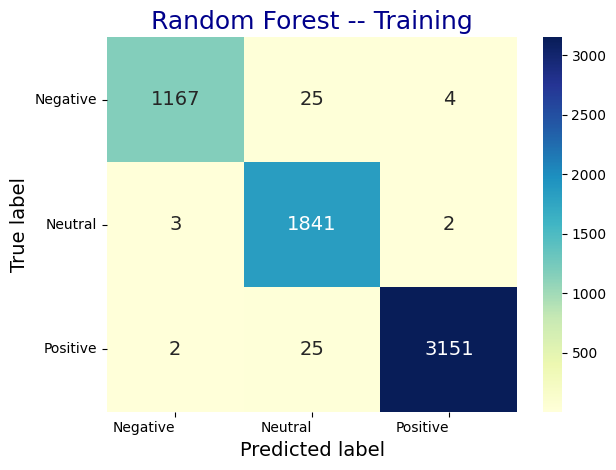

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred2)), ('Negative', 'Neutral', 'Positive'), ('Negative', 'Neutral', 'Positive'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Random Forest -- Training', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
rf_model2 = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)
y_test_pred2= rf_model2.predict(X_test_tfidf2)

print("Classification Report Random Forest -- Test:\n",
      classification_report(y_test, y_test_pred2))

Classification Report Random Forest -- Test:
               precision    recall  f1-score   support

    negative       0.65      0.49      0.56       318
     neutral       0.67      0.85      0.75       471
    positive       0.85      0.80      0.82       767

    accuracy                           0.75      1556
   macro avg       0.72      0.71      0.71      1556
weighted avg       0.75      0.75      0.75      1556



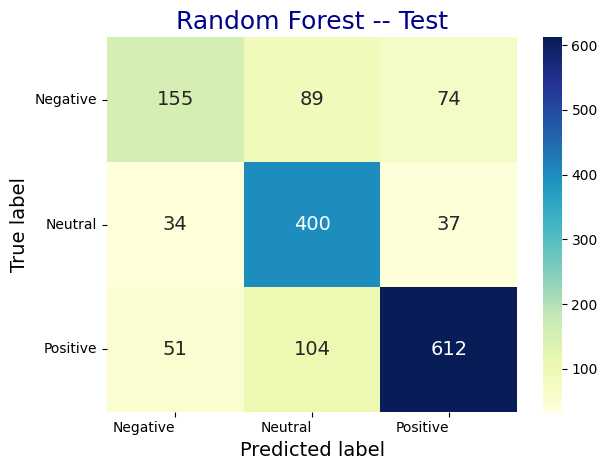

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred2)), ('Negative', 'Neutral', 'Positive'), ('Negative', 'Neutral', 'Positive'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Random Forest -- Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### Support Vector Machine

In [ ]:
svm_model2 = SVC(kernel='linear', random_state=42).fit(X_train_resampled, y_train_resampled)
y_train_pred2 = svm_model2.predict(X_train_tfidf2)

print("Classification Report Support Vector Machine -- Training:\n",
      classification_report(y_train, y_train_pred2))

Classification Report Support Vector Machine -- Training:
               precision    recall  f1-score   support

    negative       0.82      0.87      0.85      1196
     neutral       0.86      0.93      0.90      1846
    positive       0.97      0.90      0.93      3178

    accuracy                           0.90      6220
   macro avg       0.88      0.90      0.89      6220
weighted avg       0.91      0.90      0.90      6220



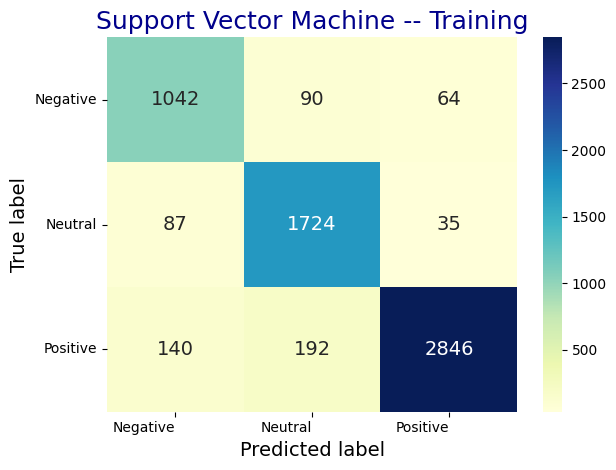

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred2)), ('Negative', 'Neutral', 'Positive'), ('Negative', 'Neutral', 'Positive'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Support Vector Machine -- Training', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
svm_model2 = SVC(kernel='linear', random_state=42).fit(X_train_resampled, y_train_resampled)
y_test_pred2 = svm_model2.predict(X_test_tfidf2)

print("Classification Report Support Vector Machine -- Test:\n",
      classification_report(y_test, y_test_pred2))

Classification Report Support Vector Machine -- Test:
               precision    recall  f1-score   support

    negative       0.54      0.55      0.54       318
     neutral       0.69      0.80      0.74       471
    positive       0.89      0.79      0.84       767

    accuracy                           0.74      1556
   macro avg       0.70      0.71      0.71      1556
weighted avg       0.76      0.74      0.75      1556



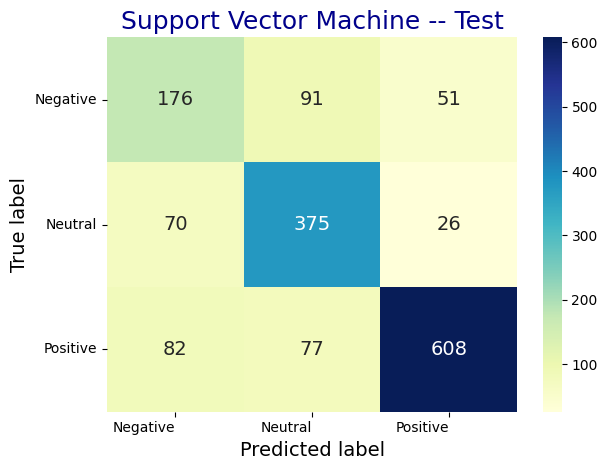

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred2)), ('Negative', 'Neutral', 'Positive'), ('Negative', 'Neutral', 'Positive'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Support Vector Machine -- Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# Conclusion

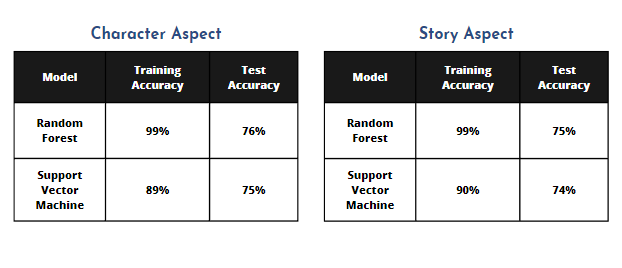

- `Random Forest` has a very high training accuracy (99%) but lower test accuracy (76% and 75%), indicating a possible overfitting issue. This model performs very well in classifying the training data but is less effective at generalizing to new data.
- `Support Vector Machine (SVM)` has lower training accuracy (89% and 90%) but almost the same test accuracy (75% and 74%). This indicates that SVM is more stable and less prone to overfitting.

Although `Random Forest` has higher accuracy on both the training set and the test set, SVM provides more `stable performance` and `shows better generalization` capabilities. Therefore, `SVM` can be considered `the best model` for sentiment analysis on both the character and story aspects due to its stability and lack of significant overfitting indications.